In [32]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [33]:
ds=pd.read_csv("LoanStatus.csv")
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
ds.shape

(614, 13)

# Checking DataTypes

In [37]:
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Checking Null Values

In [38]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Removing Null Values

Filling missing values For Categorical Columns:

In [39]:
#eXAMPLE
ds['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [40]:
ds['Gender'].fillna(ds['Gender'].mode()[0],inplace=True)
ds['Married'].fillna(ds['Married'].mode()[0],inplace=True)
ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0],inplace=True)
ds['Dependents'].fillna(ds['Dependents'].mode()[0],inplace=True)

Filling missing values For Numerical Columns:

In [41]:
ds['LoanAmount'].fillna(ds['LoanAmount'].mean(),inplace=True)
ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mean(),inplace=True)
ds['Credit_History'].fillna(ds['Credit_History'].mean(),inplace=True)

In [42]:
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the null values are removed

# EDA PROCESS

In [43]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [44]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Visualization for Categorical attributes

<AxesSubplot:xlabel='Gender', ylabel='count'>

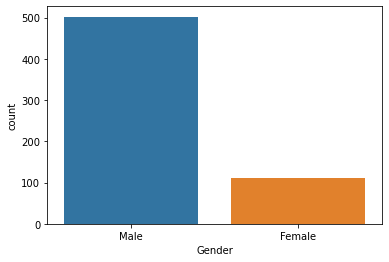

In [45]:
sns.countplot(ds['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

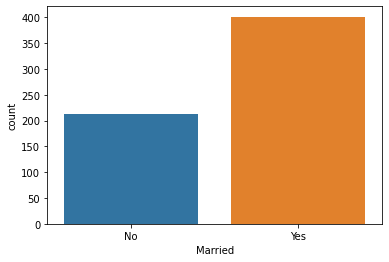

In [46]:
sns.countplot(ds['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

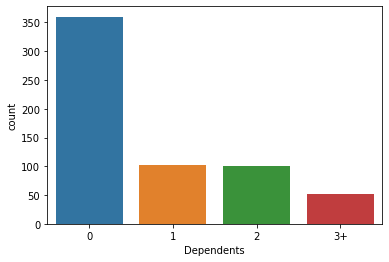

In [47]:
sns.countplot(ds['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

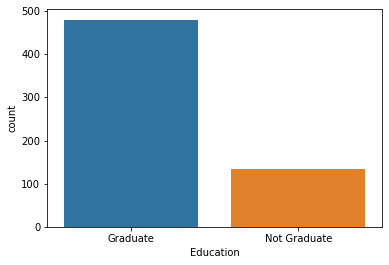

In [48]:
sns.countplot(ds['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

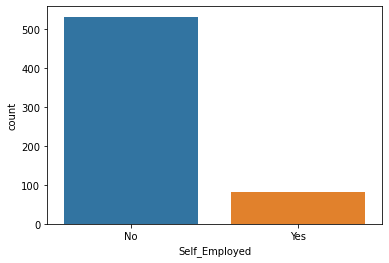

In [49]:
sns.countplot(ds['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

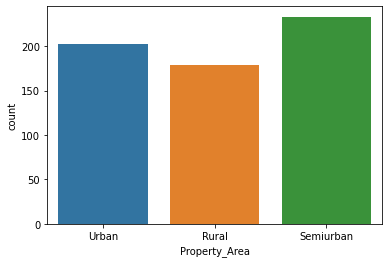

In [50]:
sns.countplot(ds['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

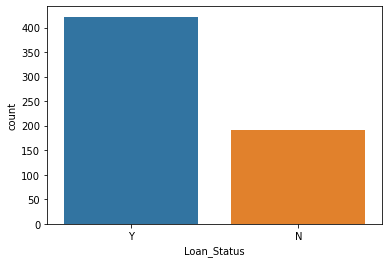

In [51]:
sns.countplot(ds['Loan_Status'])

Visualization for Numerical attributes

In [52]:
#sns.distplot(ds['ApplicantIncome'])

In [53]:
#ds['ApplicantIncome'].hist(bins=20)

# Log Transformation

In [54]:
#ds['ApplicantIncome']=np.log(ds['ApplicantIncome'])

In [55]:
#sns.distplot(ds['ApplicantIncome'])

In [56]:
#ds['ApplicantIncome'].hist(bins=20)

The data is now normalised and forms a bell curve

In [57]:
#sns.distplot(ds['CoapplicantIncome'])

In [58]:
#ds['CoapplicantIncome'].hist(bins=20)

In [59]:
#ds['CoapplicantIncome']=np.log(ds['CoapplicantIncome'])
#sns.distplot(ds['CoapplicantIncome'])

We can merge two columns i.e Applicant Income and Coapplicant Income to Total Income as they belong to same family to make a compact dataset

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

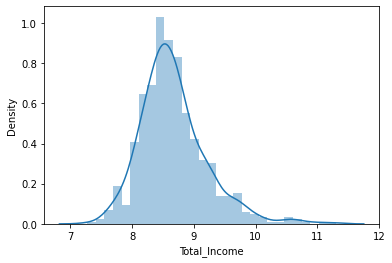

In [60]:
ds['Total_Income']=ds['ApplicantIncome']+ds['CoapplicantIncome']
ds['Total_Income']=np.log(ds['Total_Income'])
sns.distplot(ds['Total_Income'])

In [61]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

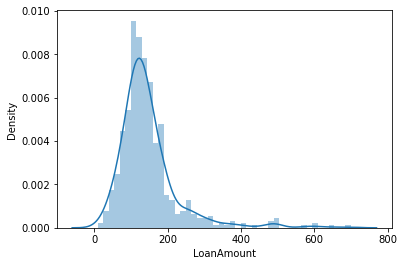

In [62]:
sns.distplot(ds['LoanAmount'])

<AxesSubplot:>

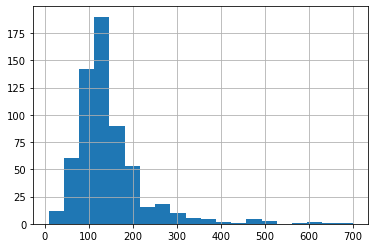

In [63]:
ds['LoanAmount'].hist(bins=20)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

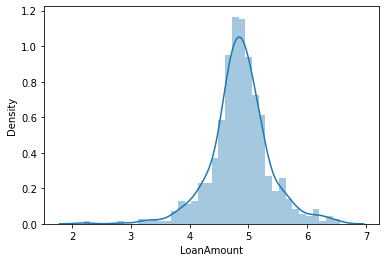

In [64]:
ds['LoanAmount']=np.log(ds['LoanAmount'])
sns.distplot(ds['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

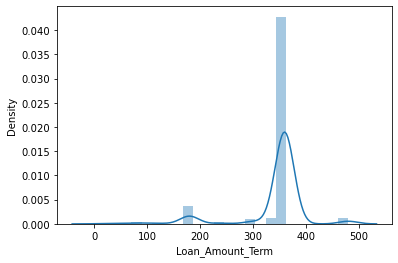

In [65]:
sns.distplot(ds['Loan_Amount_Term'])

<AxesSubplot:>

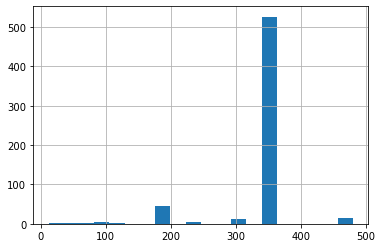

In [66]:
ds['Loan_Amount_Term'].hist(bins=20)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

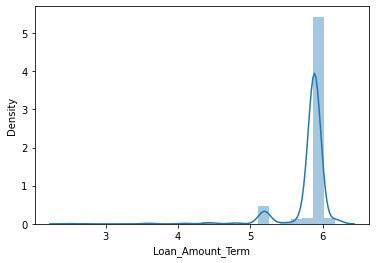

In [67]:
ds['Loan_Amount_Term']=np.log(ds['Loan_Amount_Term'])
sns.distplot(ds['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

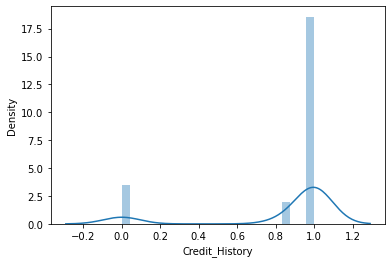

In [68]:
sns.distplot(ds['Credit_History'])

<AxesSubplot:>

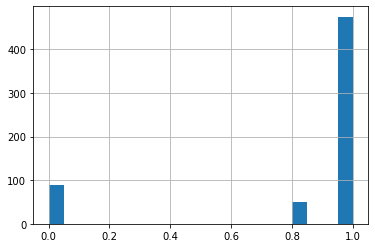

In [69]:
ds['Credit_History'].hist(bins=20)

As values are within range of 0 and 1 no need to normalised

# Correlation Matrix

In [70]:
ds.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.116605,0.434849,-0.024085,-0.014477,0.717829
CoapplicantIncome,-0.116605,1.000000,0.204179,-0.042941,-0.001665,0.383827
LoanAmount,0.434849,0.204179,1.000000,0.084534,-0.025248,0.657507
Loan_Amount_Term,-0.024085,-0.042941,0.084534,1.000000,-0.007860,-0.029522
Credit_History,-0.014477,-0.001665,-0.025248,-0.007860,1.000000,0.019156
Total_Income,0.717829,0.383827,0.657507,-0.029522,0.019156,1.000000


<AxesSubplot:>

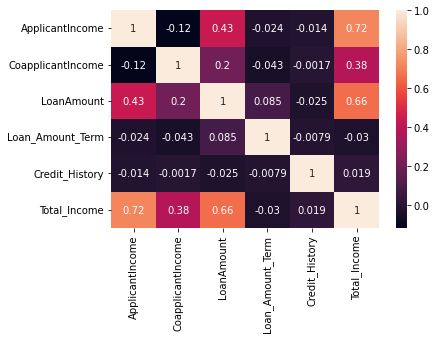

In [71]:
sns.heatmap(ds.corr(),annot=True)

In [72]:
#Dropping Unnecessary Columns
cols=['Loan_ID','ApplicantIncome','CoapplicantIncome']
ds=ds.drop(columns=cols,axis=1)
ds.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,4.986426,5.886104,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,4.852030,5.886104,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,4.189655,5.886104,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,4.787492,5.886104,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,4.948760,5.886104,1.0,Urban,Y,8.699515


# To check Outliers

<AxesSubplot:>

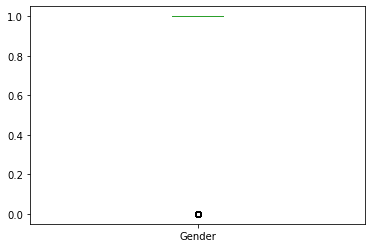

In [118]:
ds['Gender'].plot.box()

<AxesSubplot:>

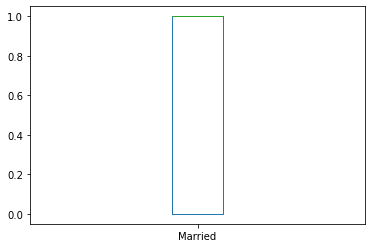

In [119]:
ds['Married'].plot.box()

<AxesSubplot:>

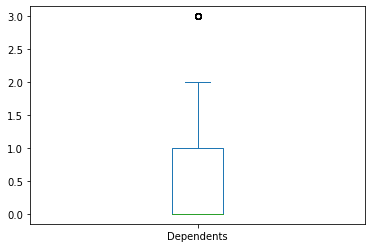

In [120]:
ds['Dependents'].plot.box()

<AxesSubplot:>

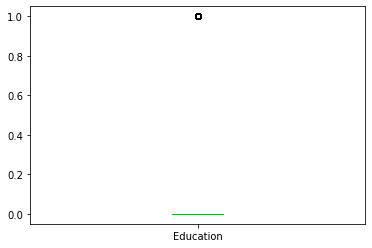

In [121]:
ds['Education'].plot.box()

<AxesSubplot:>

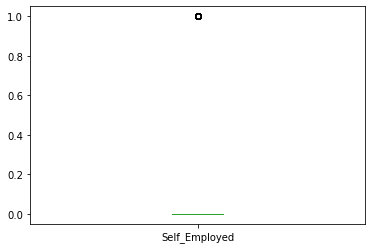

In [122]:
ds['Self_Employed'].plot.box()

<AxesSubplot:>

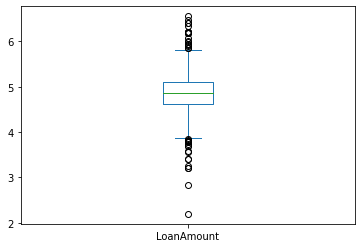

In [123]:
ds['LoanAmount'].plot.box()

<AxesSubplot:>

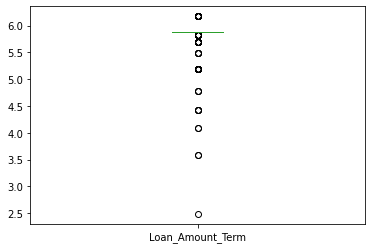

In [124]:
ds['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

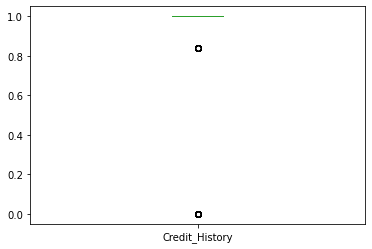

In [125]:
ds['Credit_History'].plot.box()

<AxesSubplot:>

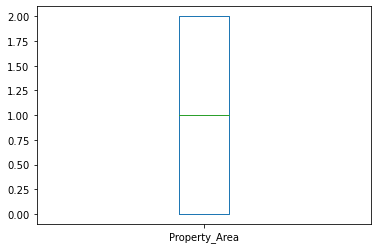

In [126]:
ds['Property_Area'].plot.box()

Few Outliers are present in the column we can eleminate that.


In [135]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)
ds_new=ds[(z<3).all(axis=1)]
ds_new

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,4.986426,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,4.948760,5.886104,1.0,2,1,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.262680,5.886104,1.0,0,1,7.972466
610,1,1,3,0,0,3.688879,5.192957,1.0,0,1,8.320205
611,1,1,1,0,0,5.533389,5.886104,1.0,2,1,9.025456
612,1,1,2,0,0,5.231109,5.886104,1.0,2,1,8.933664


In [128]:
# As we have many Categorical Attributes We must convert it into Numerical attributes For that using Label Encoding

# Label Encoder

In [136]:
from sklearn.preprocessing import LabelEncoder
columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for cols in columns:
    ds_new[cols]=le.fit_transform(ds_new[cols])

In [138]:
ds_new.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,4.986426,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,4.948760,5.886104,1.0,2,1,8.699515


# Training and Testing Data

In [139]:
x=ds_new.drop(columns=['Loan_Status'],axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,4.986426,5.886104,1.0,2,8.674026
1,1,1,1,0,0,4.852030,5.886104,1.0,0,8.714568
2,1,1,0,0,1,4.189655,5.886104,1.0,2,8.006368
3,1,1,0,1,0,4.787492,5.886104,1.0,2,8.505323
4,1,0,0,0,0,4.948760,5.886104,1.0,2,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.262680,5.886104,1.0,0,7.972466
610,1,1,3,0,0,3.688879,5.192957,1.0,0,8.320205
611,1,1,1,0,0,5.533389,5.886104,1.0,2,9.025456
612,1,1,2,0,0,5.231109,5.886104,1.0,2,8.933664


In [141]:
y=ds_new['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 589, dtype: int64

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [143]:
x_test.shape

(118, 10)

In [144]:
y_test.shape

(118,)

In [145]:
x_train.shape

(471, 10)

In [146]:
y_train.shape

(471,)

In [147]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [148]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random_state",i,"The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),"\n\n")

Output not coming

# Model Training and Cross Validation

In [149]:
#Classifying Function
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45)
    model.fit(x_train,y_train)
    print('Accuracy is',model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print('Cross validation is',np.mean(score)*100)

In [150]:
model=LogisticRegression()
classify(model,x,y)

Accuracy is 84.7457627118644
Cross validation is 81.66739098942489


# RandomForestClassifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,x,y)

Accuracy is 83.61581920903954
Cross validation is 78.44270606982471


# DecisionTreeClassifier

In [152]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy is 75.14124293785311
Cross validation is 69.60596841952776


# Support Vector Classifier

In [153]:
from sklearn import svm
model=svm.SVC(kernel='linear')
classify(model,x,y)

Accuracy is 84.7457627118644
Cross validation is 81.49789946400115


# Hyperparameter tuning

In [154]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
classify(model,x,y)

Accuracy is 83.61581920903954
Cross validation is 80.8184847167898


# Confusion Matrix

In [155]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [156]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[17, 19],
       [ 4, 78]], dtype=int64)

<AxesSubplot:>

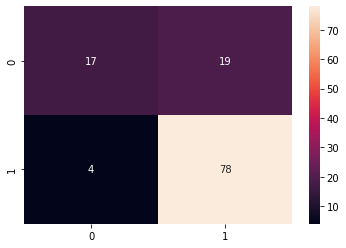

In [157]:
sns.heatmap(cm,annot=True)

In [158]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [159]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[14, 22],
       [ 0, 82]], dtype=int64)

<AxesSubplot:>

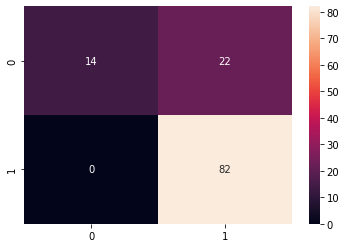

In [160]:
sns.heatmap(cm,annot=True)

# AUC ROC Curve

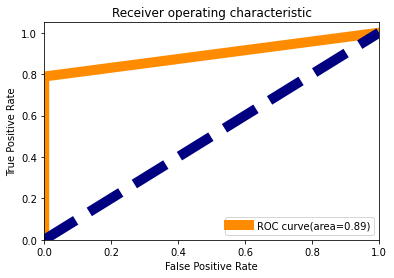

In [161]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Saving

In [162]:
import pickle
filename="LoanPrediction.pkl"
pickle.dump(lr,open(filename,'wb'))

In [163]:
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
ds_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
ds_com

,original,predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
113,1,1
114,0,1
115,1,1
116,1,1
